In [57]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from pandas_profiling import ProfileReport

# Read dataframe and data cleaning

In [2]:
cancer_df = pd.read_csv("Resources/tumor.csv")
cancer_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cancer_df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
cancer_df.drop("Sample code number", axis=1, inplace=True)

In [7]:
cancer_df.isnull().count()

Clump Thickness                683
Uniformity of Cell Size        683
Uniformity of Cell Shape       683
Marginal Adhesion              683
Single Epithelial Cell Size    683
Bare Nuclei                    683
Bland Chromatin                683
Normal Nucleoli                683
Mitoses                        683
Class                          683
dtype: int64

There are no null values in the rest of the columns

# Data Visualization by Pandas Profiling

Class column has 2 values: 2 -- Benign, 4 -- Malignant

In [19]:
profile = Profilereport(cancer_df, title="Breast Cancer profile")

NameError: name 'Profilereport' is not defined

# Machine Learning

K Nearest Neighbors

In [24]:
# define X, y

X = cancer_df.drop("Class", axis=1)
y = cancer_df["Class"]

In [27]:
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
# Fit into model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
# Test model
model.score(X_test, y_test)

0.9766081871345029

In [30]:
# Scale data and see how much scaled data can improve the outcome
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Fit scaled data into the model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.9766081871345029

No improvement in this case

Hypertuning parameters:

In [39]:
from sklearn.model_selection import GridSearchCV
# list the parameters that need to be tuned
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid = GridSearchCV(model, param_grid, verbose=1)

In [43]:
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits
{'leaf_size': 4, 'n_neighbors': 8, 'p': 2}
0.968741671425852


# Random Forest

In [35]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.9707602339181286

In [48]:
# Decide feature importances
features_importances = RF.feature_importances_

In [49]:
# Create a dataframe for features and feature importances
features_names = list(X.columns)
features = {"Features_names": features_names, "Importances": list(features_importances)}
features_df = pd.DataFrame(data=features)
features_df

,Features_names,Importances
0,Clump Thickness,0.043152
1,Uniformity of Cell Size,0.263325
2,Uniformity of Cell Shape,0.234866
3,Marginal Adhesion,0.029664
4,Single Epithelial Cell Size,0.080641
5,Bare Nuclei,0.234521
6,Bland Chromatin,0.055932
7,Normal Nucleoli,0.053921
8,Mitoses,0.003977


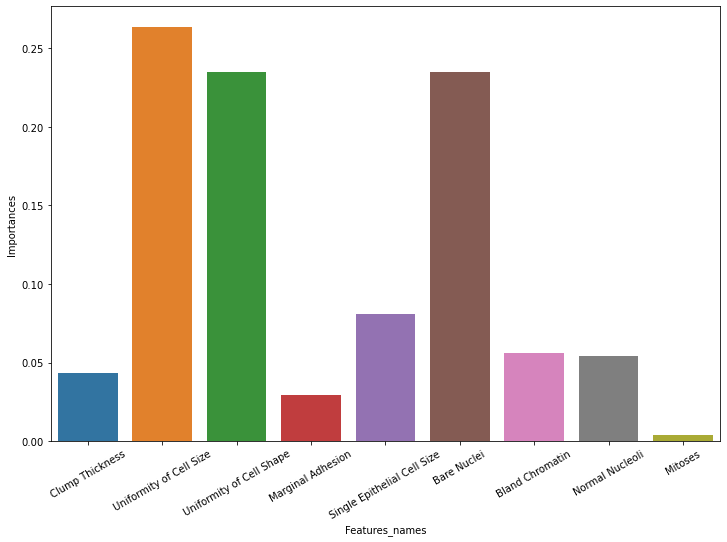

In [56]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x=features_df.Features_names, y=features_df.Importances)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

In [61]:
# Test the model
y_prediction = RF.predict(X_test)
conmax = confusion_matrix(y_test, y_prediction)
print(conmax)
accuracy_score(y_test, y_prediction)

[[110   4]
 [  1  56]]


0.9707602339181286